# <center><b><h1></h1></b></center>

<h1 align="center"><b>DubMaster:</b></h1>
<h2 align="center"><b>AI-Powered Video Translator</b></h2>

<center>
<img src="https://www.stayaheadofai.com/content/images/size/w2640/2023/03/grid_0.webp" width=500>
</center>






### **1.Getting started**


<a href="https://github.com/Merve-Altuntas/DubMaster-AI_Powered_Video_Translator/blob/main/DubMaster_AI_Video_Translator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Welcome to DubMaster, your creative companion for the world of multilingual video dubbing! With DubMaster, you can easily translate your own short videos into the fascinating languages of

**Turkish**

<img src="https://em-content.zobj.net/source/emojione/151/flag-for-turkey_1f1f9-1f1f7.png" width=50>

**Hindi**


<img src="https://em-content.zobj.net/source/emojione/151/flag-for-india_1f1ee-1f1f3.png" width=50>

and **English**

<img src="https://em-content.zobj.net/source/emojione/151/flag-for-united-states_1f1fa-1f1f8.png" width=50>

But that's not all - we go one step further!


Dive into the innovative world of DubMaster, where your videos are not only translated, but also provided with an authentic, cloned voice. Amaze your audience with accent-free, lively dialog in different languages and bring your creations to life!

But that's not all - DubMaster even goes so far as to match your characters' lip movements to the selected language. Your characters will speak as if they've never spoken another language! It's the magic of dubbing that takes your videos to a whole new level.

Before you dive into the fascinating world of DubMaster, we want to make sure that your experience is smooth and fulfilling. Please take a few moments to read the **enclosed manual** carefully. Here you will find all the important information and instructions to help you unleash the full potential of DubMaster.

The manual not only provides an overview of DubMaster's features and capabilities, but also detailed step-by-step instructions to ensure you get the most out of every feature.

In this Jupyter Notebook you will find all the **important information** marked with `⚠️` that you should consider before running each cell. Careful attention to these instructions will ensure a smooth and successful experience when using our program.

When you're ready, let's get started with DubMaster

<img src="https://cdn.dribbble.com/users/835519/screenshots/2651153/media/88df4e54e2a63400c340a18eaaab06e9.gif" width=200>


---


**⚠️ Important**: As runtime type select Python 3 and as hardware accelerator select T4 GPU. You can do that by clicking `Runtime > Change runtime type`.


---

### **2. Installing dependencies**

In [ ]:
#@title 2.1 Clone our Repository and move files to the session memory /content
%cd /content
!git clone https://github.com/Merve-Altuntas/DubMaster-AI_Powered_Video_Translator.git

import shutil
import os

# Specify the path to the cloned project directory
cloned_project_path = '/content/DubMaster-AI_Powered_Video_Translator'

# Specify the destination directory (/content in this case)
destination_path = '/content/'

# List all files in the cloned project directory
files = os.listdir(cloned_project_path)

# Move each file to the destination directory
for file in files:
    source_file_path = os.path.join(cloned_project_path, file)
    destination_file_path = os.path.join(destination_path, file)

    # Move the file
    shutil.move(source_file_path, destination_file_path)

# remove the empty cloned project directory
shutil.rmtree(cloned_project_path)




---


Now let's install all other required packages. Executing all cells containing installation commands take in total approx. 3 minutes.


---



### 2.2 Install all required packages and repositories
For the audio extraction of the uploaded video, we are using [moviepy](https://zulko.github.io/moviepy/ref/ffmpeg.html). Transcribing the spoken word into text is done with the help of OpenAI's [whisper](https://openai.com/research/whisper) model. Our user-friendly web application is created with [Gradio](https://www.gradio.app/) and with [Deep Translator](https://pypi.org/project/deep-translator/), we were able to translate the texts into the desired language.



In [ ]:
!pip install ffmpeg moviepy
!pip install openai-whisper
!pip install gradio
!pip install deep_translator

To obtain a clean audio file, noise reduction was performed using [DeepFilterNet](https://github.com/Rikorose/DeepFilterNet).

In [ ]:
%cd /content
!pip install torch torchaudio -f https://download.pytorch.org/whl/cpu/torch_stable.html
!git clone https://github.com/Rikorose/DeepFilterNet.git
!pip install deepfilternet

For lip syncing we decided to use Wav2Lip + GAN. This used [repository](https://huggingface.co/commanderx/Wav2Lip-HD) or [this](https://github.com/saifhassan/Wav2Lip-HD) is a fork of the [original repository](https://github.com/Rudrabha/Wav2Lip) and offers a high accuracy of lip movements.

In [ ]:
!git clone https://huggingface.co/commanderx/Wav2Lip-HD
%cd Wav2Lip-HD
!pip install -r requirements.txt

To get a increased quality of the output video, we used [Real-ESRGAN](https://github.com/xinntao/Real-ESRGAN), which upsamples the individual frames created by Wav2Lip by a factor of 4. The enhanced images are then stitched together to create a video.

In [ ]:
%cd /content
!git clone https://github.com/xinntao/Real-ESRGAN.git

For the Voice cloning component we used the [XTTS](https://github.com/coqui-ai/TTS) model from coqui.ai, which enables very realistic voice cloning

In [ ]:
!pip install TTS
!pip3 install --upgrade numpy # 1.26.3

---
⚠️ **Important:** After installing all necessary packages and libraries,
please **restart the session** before playing the next cell.

---



### **3. Run application**

#### **3.1 Confirmations**
3.1.1. Everytime you play this following cell, you have to agree to the terms of use from the manual you have read by typing the word "Verstanden" in the displayed textbox.

 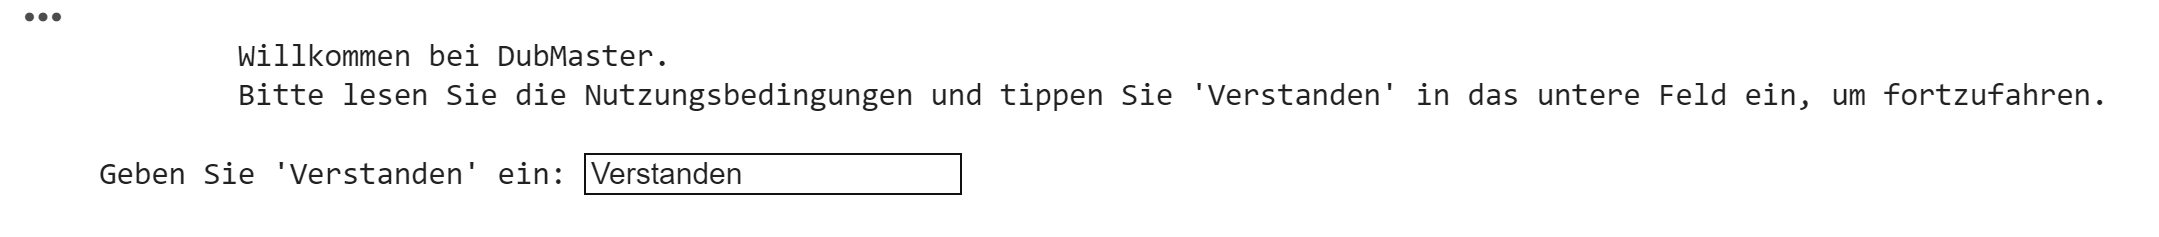

3.1.2. Everytime you are connected with a new runtime (not session), then you will get following output, while playing the pipeline:

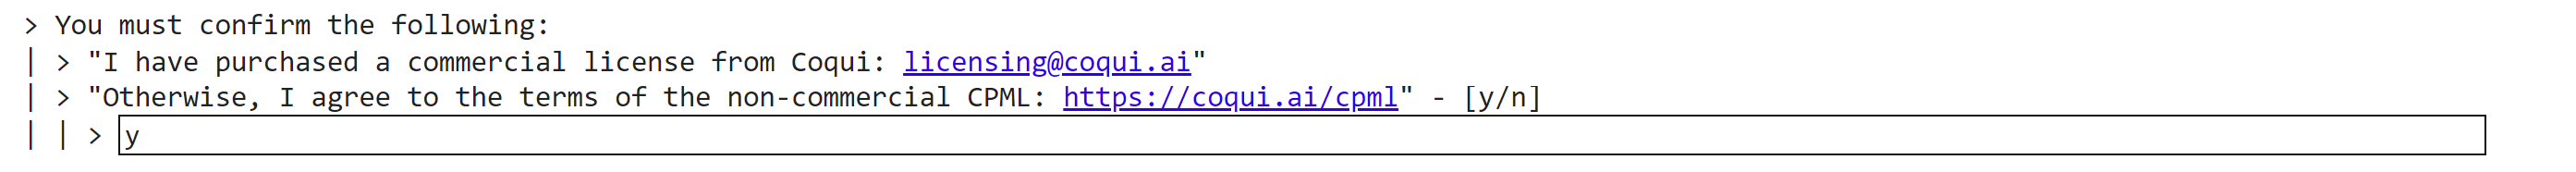

You have to confirm the terms by entering the letter `y`.


#### **3.2 How to use DubMaster:**
1. After hitting the play button and agreeing the terms of use (see Confirmations 3.1.1), you have to upload a .mp4-file of approx. 10 seconds in length with a person speaking in German
2. Select a language in the drop-down menu into which the uploaded video is to be translated. You can choose between Turkish, Hindi and English.
3. While the pipeline is running step by step, you must agree to the terms of coqui-TTS  (see Confirmations 3.1.2)
4. After the pipeline has run completely, you can see your translated video on the right side of the Gradio webapp.

You will see following messages while the pipeline is executed. This allows you to track the current position of the pipeline:

✅ The audio was extracted from the video

✅ The spoken words were transcribed from the audio

✅ The transcription was translated into the target language

✅ The voice was cloned

✅ Lip synchronization has been performed

🩷🎤 Dubbing is completed. Please look at the output window of the gradio app



---


**⚠️ Important**: If you have just opened the notebook and have already installed the packages above, you do not need to run this cell.

Every time you start the web application and have not reset the entire runtime, you have to install these packages again! This is because the Voice Cloning component and the Lipsyn component use different types of Numpy and Librosa.
Then again please **restart the session**


---



In [ ]:
!pip install TTS
!pip install numpy==1.26.3

#### **3.3 So here we are finally getting started. Have fun using DubMaster**

In [ ]:
# Running the .py files, where the translation pipeline and the web application is
%run "./DubMasterWebApp.py"

webapp = WebApplication()
webapp.create_web_application()




---


You now have your dubbed video. In the following cell, the quality is improved by a factor of 4 with Real-ESRGAN. Due to the computing power, this part must be separated from the pipeline.

Wav2Lip divides the entire video into individual frames. Depending on how many frames have been created, the quality improvement may take longer or shorter.

As a reference: 297 frames took approx. 11 minutes

**⚠️ Important**: Before you play the next cell, please **restart the session**


---



In [ ]:
#@title Real-ESRGAN
%cd /content/Real-ESRGAN

# Set up the environment
!pip install -qq basicsr
!pip install -qq facexlib
!pip install -qq gfpgan
!pip install -qq -r requirements.txt
!python setup.py develop

In [ ]:
%cd /content/Real-ESRGAN

# creating subfolders "upload" and "result"
!mkdir upload
!mkdir results

# copy all the generated frames from wav2lip into the upload folder from Real-ESRGAN
!cp -r /content/Wav2Lip-HD/frames_wav2lip/muted_video/* /content/Real-ESRGAN/upload/

**⚠️ Important**: Before you play the next cell, please **restart the session** so that the changes can be saved.

In [ ]:
%cd /content/Real-ESRGAN
# enhance each frame
!python inference_realesrgan.py -n RealESRGAN_x4plus -i upload --outscale 3.5 --face_enhance

# copy audio file into results folder from Real-ESRGAN
!cp -r /content/generated_voice.wav /content/Real-ESRGAN/results/


Last but not least we have to combine all the enhanced frames and the audio file to make the enhanced video.
This cell approx. takes 4 minutes

In [ ]:
# combine all of the frames and the audio file to make the enhanced video
%cd /content/Real-ESRGAN/results
!ffmpeg -r 30 -i frame_%05d_out.jpg -i generated_voice.wav -vcodec libx264 -crf 25 -preset veryslow -acodec copy final_dubbed_video_HD.mkv

**Now lets see the difference**

You can find the final enhanced video under `/content/Real-ESRGAN/results/final_dubbed_video_HD.mkv`